In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [9]:
data=pd.read_csv("StudentsPerformance.csv")
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


##### 1.number of males and females participated in the test

In [4]:
data.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

##### 2.students' parental level of education

In [5]:
data['parental level of education'].value_counts().reset_index()

,index,parental level of education
0,some college,226
1,associate's degree,222
2,high school,196
3,some high school,179
4,bachelor's degree,118
5,master's degree,59


In [6]:
parent_educn=data['parental level of education'].value_counts().index

parent_educn

Index(['some college', 'associate's degree', 'high school', 'some high school',
       'bachelor's degree', 'master's degree'],
      dtype='object')

In [8]:
count=data['parental level of education'].value_counts().values

count

array([226, 222, 196, 179, 118,  59], dtype=int64)

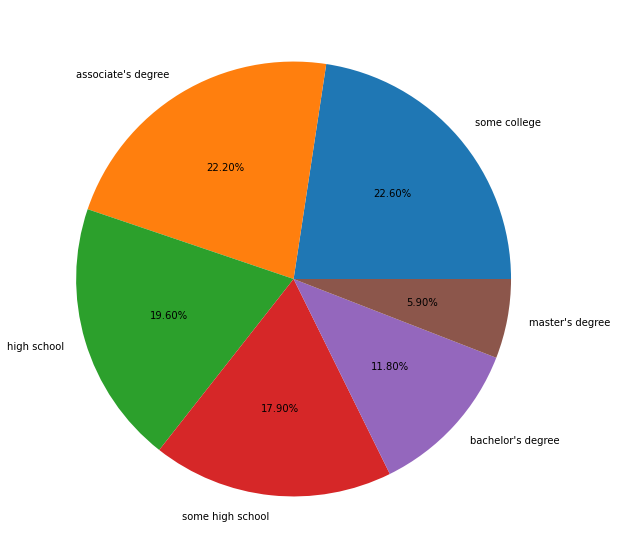

In [10]:
plt.figure(figsize=(11,10))
plt.pie(count, labels=parent_educn, autopct='%1.2f%%')
plt.show()

##### 3.(a)Who scores the most on average for math, reading and writing based on gender

In [10]:
data.groupby('gender')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


#####    3.(b)Who scores the most on average for math, reading and writing based on test preparation course


In [11]:
data.groupby('test preparation course')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


#####  4.(a)scoring variation for math,reading and writing based on gender

In [14]:
data.groupby('gender')[['math score','reading score','writing score']].var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


##### 4.(b)scoring variation for math,reading and writing based on test preparation score

In [16]:
data.groupby('test preparation course')[['math score','reading score','writing score']].var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


###### 5. The management needs your help to give bonus points to the top 25% ofstudents based on their math score, so how will you help the management to achieve this

In [11]:
math_toppers=data['math score'].quantile(.75)

In [12]:
math_toppers

77.0

In [13]:
data[data['math score']>= math_toppers]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
